Data Loading, Inspection, and Preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
file_path = 'restaurant_menu_optimization_data.csv'
df = pd.read_csv(file_path)

# Basic dataset inspection
df.info()  # General info: types, missing values
df.head()  # Check the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


Checking Missing Values and Handling Them

In [2]:
# Checking for missing values
df.isnull().sum()
df = df.dropna()  # Drop rows with missing values for simplicity, could also impute

Descriptive Statistics of Numerical Columns

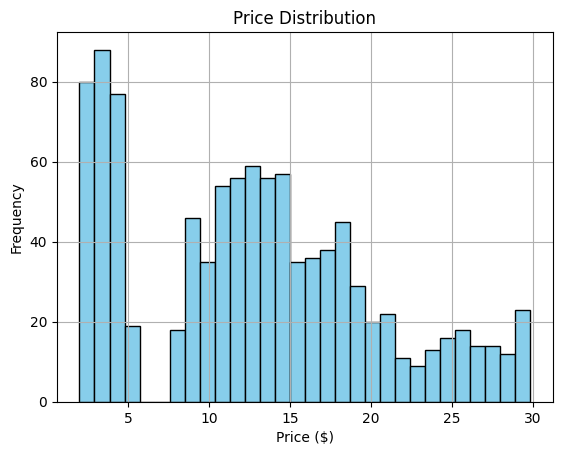

In [3]:
# Generating descriptive statistics
df.describe()

# Checking distribution of prices and other numerical features
df['Price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

Distribution of Profitability and MenuCategory

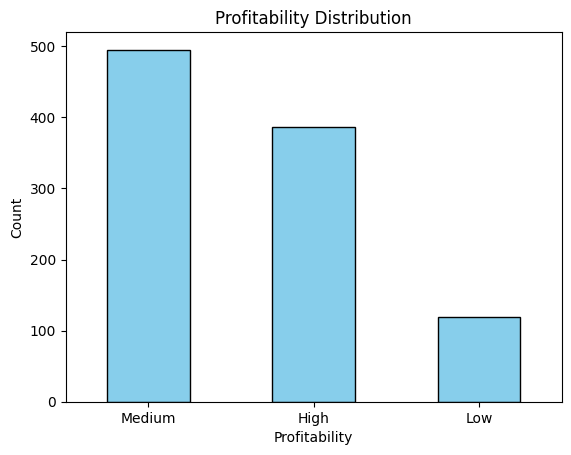

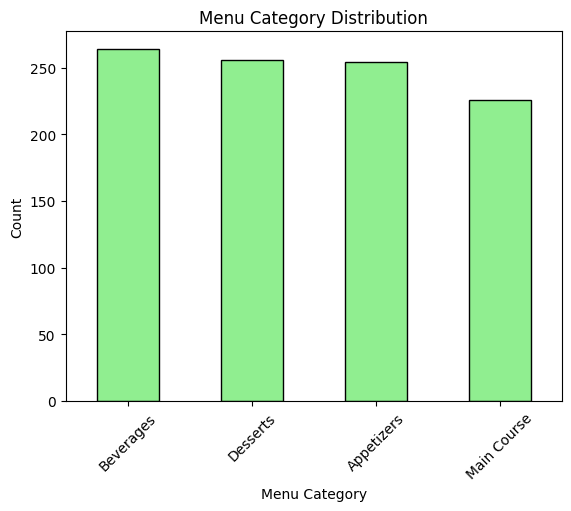

In [4]:
# Checking profitability distribution
df['Profitability'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Profitability Distribution')
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Checking distribution of menu categories
df['MenuCategory'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Menu Category Distribution')
plt.xlabel('Menu Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Encoding the Profitability and MenuCategory

In [5]:
# Encoding categorical columns like Profitability and MenuCategory
df['Profitability_encoded'] = df['Profitability'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['MenuCategory_encoded'] = df['MenuCategory'].astype('category').cat.codes

# Check the encoding
df[['Profitability', 'Profitability_encoded', 'MenuCategory', 'MenuCategory_encoded']].head()

,Profitability,Profitability_encoded,MenuCategory,MenuCategory_encoded
0,Low,0,Beverages,1
1,Medium,1,Appetizers,0
2,High,2,Desserts,2
3,High,2,Main Course,3
4,Medium,1,Main Course,3


Processing Ingredient Data (Feature Engineering)

In [6]:
import ast

# Function to extract ingredients
def extract_ingredients(ingredients_str):
    ingredients_list = ast.literal_eval(ingredients_str)  # Convert string representation of list to list
    return ingredients_list

# Apply function to extract ingredients
df['Ingredients_List'] = df['Ingredients'].apply(extract_ingredients)

# Flatten the ingredients list and create a dummy variable for each unique ingredient
all_ingredients = set([ingredient for sublist in df['Ingredients_List'] for ingredient in sublist])

# Create a column for each ingredient
for ingredient in all_ingredients:
    df[ingredient] = df['Ingredients_List'].apply(lambda x: 1 if ingredient in x else 0)

# Check the resulting dataframe
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,Profitability_encoded,MenuCategory_encoded,Ingredients_List,Chicken,...,Parmesan,Basil,Chocolate,Olive Oil,Butter,Sugar,Eggs,Alfredo Sauce,confidential,Tomatoes
0,R003,Beverages,Soda,['confidential'],2.55,Low,0,1,[confidential],0,...,0,0,0,0,0,0,0,0,1,0
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium,1,0,"[Tomatoes, Basil, Garlic, Olive Oil]",0,...,0,1,0,1,0,0,0,0,0,1
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High,2,2,"[Chocolate, Butter, Sugar, Eggs]",0,...,0,0,1,0,1,1,1,0,0,0
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High,2,3,"[Chicken, Fettuccine, Alfredo Sauce, Parmesan]",1,...,1,0,0,0,0,0,0,1,0,0
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium,1,3,"[Chicken, Fettuccine, Alfredo Sauce, Parmesan]",1,...,1,0,0,0,0,0,0,1,0,0


Visualizing Price Distribution Across Profitability Categories

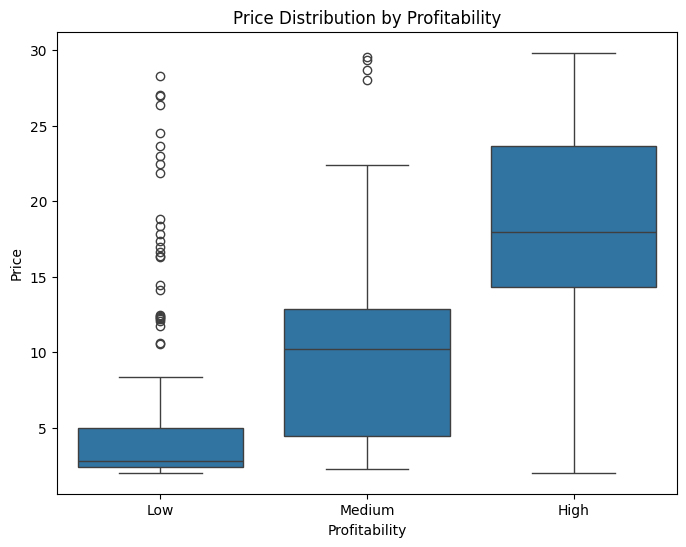

In [8]:
# Boxplot of Price vs Profitability
plt.figure(figsize=(8, 6))
sns.boxplot(x='Profitability', y='Price', data=df)
plt.title('Price Distribution by Profitability')
plt.show()

Pairplot for Price vs Profitability vs MenuCategory

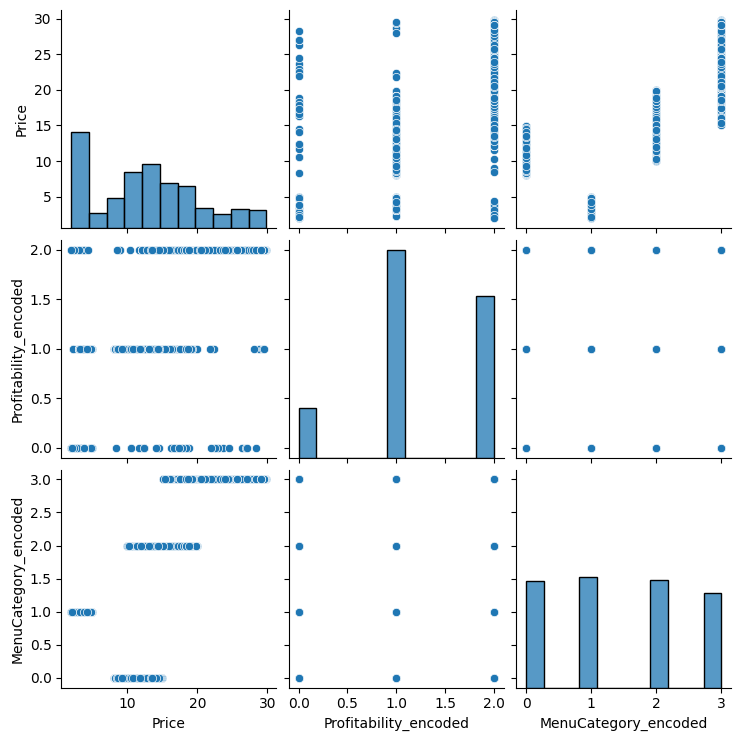

In [9]:
# Pairplot for price, profitability, and menu category
sns.pairplot(df[['Price', 'Profitability_encoded', 'MenuCategory_encoded']])
plt.show()

Exploring Menu Item Frequency and Top Items

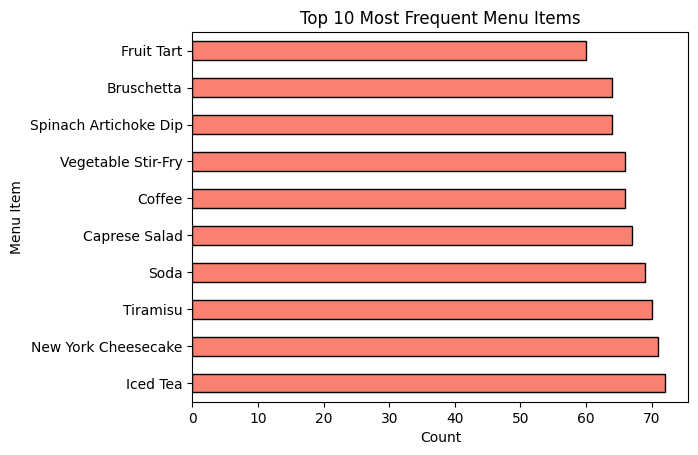

In [10]:
# Frequency of menu items
menu_item_counts = df['MenuItem'].value_counts().head(10)

# Display the top 10 most common menu items
menu_item_counts.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Top 10 Most Frequent Menu Items')
plt.xlabel('Count')
plt.ylabel('Menu Item')
plt.show()

One-Hot Encoding of MenuCategory and Ingredients

In [11]:
# One-Hot Encoding MenuCategory
df_encoded = pd.get_dummies(df, columns=['MenuCategory'])

# One-Hot Encoding Ingredients (from ingredient columns created earlier)
ingredient_columns = list(all_ingredients)
df_encoded = pd.get_dummies(df_encoded, columns=ingredient_columns)

# Check the resulting dataframe
df_encoded.head()

,RestaurantID,MenuItem,Ingredients,Price,Profitability,Profitability_encoded,MenuCategory_encoded,Ingredients_List,MenuCategory_Appetizers,MenuCategory_Beverages,...,Sugar_0,Sugar_1,Eggs_0,Eggs_1,Alfredo Sauce_0,Alfredo Sauce_1,confidential_0,confidential_1,Tomatoes_0,Tomatoes_1
0,R003,Soda,['confidential'],2.55,Low,0,1,[confidential],False,True,...,True,False,True,False,True,False,False,True,True,False
1,R001,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium,1,0,"[Tomatoes, Basil, Garlic, Olive Oil]",True,False,...,True,False,True,False,True,False,True,False,False,True
2,R003,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High,2,2,"[Chocolate, Butter, Sugar, Eggs]",False,False,...,False,True,False,True,True,False,True,False,True,False
3,R003,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High,2,3,"[Chicken, Fettuccine, Alfredo Sauce, Parmesan]",False,False,...,True,False,True,False,False,True,True,False,True,False
4,R002,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium,1,3,"[Chicken, Fettuccine, Alfredo Sauce, Parmesan]",False,False,...,True,False,True,False,False,True,True,False,True,False


Normalizing Price Feature

In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize the 'Price' feature
scaler = StandardScaler()
df_encoded['Price_scaled'] = scaler.fit_transform(df_encoded[['Price']])

# Check the normalized prices
df_encoded[['Price', 'Price_scaled']].head()

,Price,Price_scaled
0,2.55,-1.385057
1,11.12,-0.229045
2,18.66,0.788029
3,29.55,2.256986
4,17.73,0.662581


from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price_scaled'].plot(kind='hist', bins=20, title='Price_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Price', y='Price_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Price_scaled'].plot(kind='line', figsize=(8, 4), title='Price_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

Training Machine Learning Models (Decision Tree)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
def process_ingredients(ingredients):
    if isinstance(ingredients, str):
        try:
            ingredients = eval(ingredients)
        except:
            ingredients = []  # Fallback if eval fails
    return len(ingredients)

# Apply the function to process ingredients and count them
df_encoded['Ingredient_Count'] = df_encoded['Ingredients_List'].apply(process_ingredients)

# Ensure all categorical variables are properly encoded
# First, we will encode 'Profitability' column
label_encoder = LabelEncoder()
df_encoded['Profitability_encoded'] = label_encoder.fit_transform(df_encoded['Profitability'])

# Now drop non-numeric columns (like MenuItem, RestaurantID, Ingredients)
X = df_encoded.drop(columns=['Profitability', 'Profitability_encoded', 'RestaurantID', 'MenuItem', 'Ingredients_List', 'Ingredients'])

# Ensure that all columns are numeric
X = pd.get_dummies(X, drop_first=True)  # One-hot encode all categorical variables (like MenuCategory and ingredients)

# The target variable (Profitability_encoded)
y = df_encoded['Profitability_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_preds = dt_model.predict(X_test)

# Evaluate the model performance
print("Decision Tree Model Accuracy: ", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))


Decision Tree Model Accuracy:  0.825
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.63      0.48      0.55        25
           2       0.86      0.88      0.87        98

    accuracy                           0.82       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.82      0.82      0.82       200



Hyperparameter Tuning for Decision Tree

In [22]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Decision Tree: ", grid_search.best_params_)

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 20}


Random Forest Model Training

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test)
print("Random Forest Model Accuracy: ", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Model Accuracy:  0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.72      0.52      0.60        25
           2       0.87      0.93      0.90        98

    accuracy                           0.85       200
   macro avg       0.82      0.77      0.79       200
weighted avg       0.85      0.85      0.85       200



Neural Network Model (MLPClassifier)

In [27]:
from sklearn.neural_network import MLPClassifier

# Train a simple neural network
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
mlp_preds = mlp_model.predict
# Predict using the Neural Network Model
mlp_preds = mlp_model.predict(X_test)

# Evaluate the Neural Network Model's performance
print("Neural Network Model Accuracy: ", accuracy_score(y_test, mlp_preds))
print("Classification Report:\n", classification_report(y_test, mlp_preds))



Neural Network Model Accuracy:  0.885
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        77
           1       0.87      0.52      0.65        25
           2       0.91      0.93      0.92        98

    accuracy                           0.89       200
   macro avg       0.88      0.80      0.82       200
weighted avg       0.88      0.89      0.88       200



Model Comparison Based on Accuracy and Other Metrics

In [28]:
# Compare models: Decision Tree, Random Forest, and Neural Network
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Neural Network": mlp_model
}

for model_name, model in models.items():
    preds = model.predict(X_test)
    print(f"{model_name} Accuracy: ", accuracy_score(y_test, preds))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, preds))

Decision Tree Accuracy:  0.825
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.63      0.48      0.55        25
           2       0.86      0.88      0.87        98

    accuracy                           0.82       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.82      0.82      0.82       200

Random Forest Accuracy:  0.855
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.72      0.52      0.60        25
           2       0.87      0.93      0.90        98

    accuracy                           0.85       200
   macro avg       0.82      0.77      0.79       200
weighted avg       0.85      0.85      0.85       200

Neural Network Accuracy:  0.885
Neural Network Classification Report:
               precision    re

Confusion Matrix for Model Evaluation

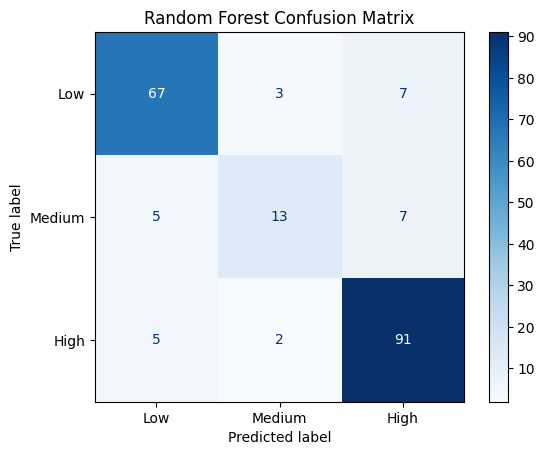

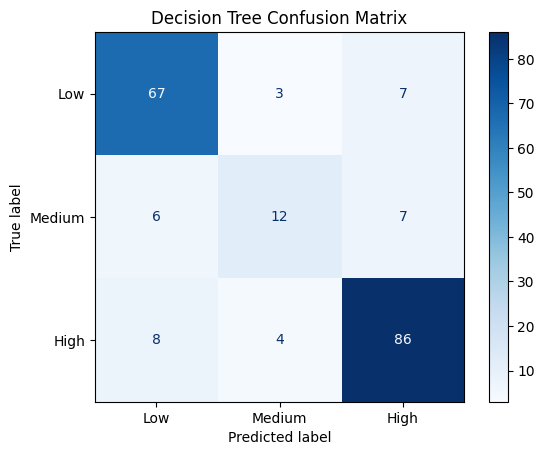

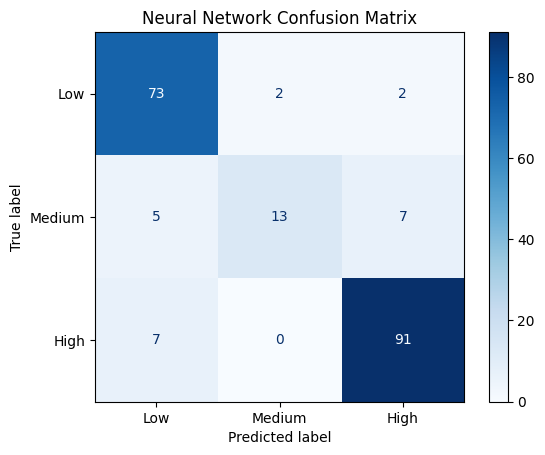

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Low', 'Medium', 'High'])
cm_display.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Low', 'Medium', 'High'])
cm_display.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Confusion Matrix for Neural Network
cm_mlp = confusion_matrix(y_test, mlp_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['Low', 'Medium', 'High'])
cm_display.plot(cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.show()

ROC Curve for Model Performance Evaluation

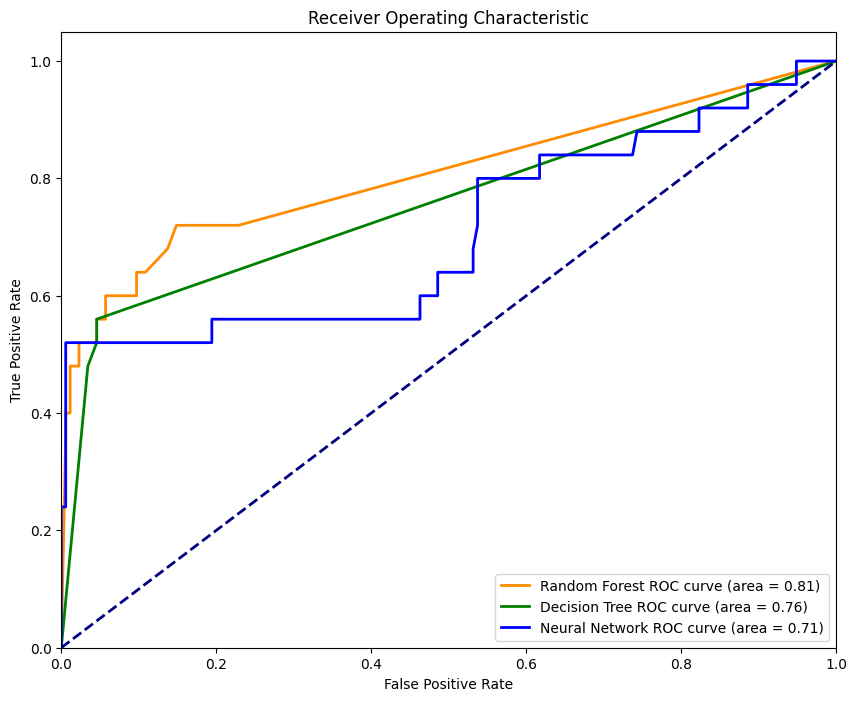

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve for Neural Network
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='Neural Network ROC curve (area = %0.2f)' % roc_auc_mlp)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Cross-Validation to Assess Model Stability

In [31]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean Cross-Validation Accuracy: {rf_cv_scores.mean()}")

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Mean Cross-Validation Accuracy: {dt_cv_scores.mean()}")

# Cross-validation for Neural Network
mlp_cv_scores = cross_val_score(mlp_model, X, y, cv=5, scoring='accuracy')
print(f"Neural Network Cross-Validation Scores: {mlp_cv_scores}")
print(f"Mean Cross-Validation Accuracy: {mlp_cv_scores.mean()}")

Random Forest Cross-Validation Scores: [0.865 0.855 0.89  0.88  0.865]
Mean Cross-Validation Accuracy: 0.8709999999999999
Decision Tree Cross-Validation Scores: [0.86  0.815 0.84  0.87  0.865]
Mean Cross-Validation Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Cross-Validation Scores: [0.91  0.89  0.93  0.95  0.895]
Mean Cross-Validation Accuracy: 0.9149999999999998


Feature Engineering for Future Models

In [33]:
# Feature engineering: Create interaction terms (Price * Category) or (Price * Ingredient Count)
df_encoded['Price_MenuCategory'] = df_encoded['Price_scaled'] * df_encoded['MenuCategory_encoded']
df_encoded['Ingredient_Count'] = df_encoded['Ingredients_List'].apply(len)

# Check the new features
df_encoded[['Price_MenuCategory', 'Ingredient_Count']].head()

,Price_MenuCategory,Ingredient_Count
0,-1.385057,1
1,-0.000000,4
2,1.576058,4
3,6.770959,4
4,1.987742,4


from matplotlib import pyplot as plt
_df_5['Price_MenuCategory'].plot(kind='hist', bins=20, title='Price_MenuCategory')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Ingredient_Count'].plot(kind='hist', bins=20, title='Ingredient_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Price_MenuCategory', y='Ingredient_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ingredient_Count']
  ys = series['Price_MenuCategory']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Ingredient_Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ingredient_Count')
_ = plt.ylabel('Price_MenuCategory')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ingredient_Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ingredient_Count'}, axis=1)
              .sort_values('Ingredient_Count', ascending=True))
  xs = counted['Ingredient_Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Ingredient_Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ingredient_Count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['Price_MenuCategory'].plot(kind='line', figsize=(8, 4), title='Price_MenuCategory')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Ingredient_Count'].plot(kind='line', figsize=(8, 4), title='Ingredient_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

Feature Selection for Improved Model Performance

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 best features based on ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Display the selected features
selected_features = pd.DataFrame(selector.get_support(), index=X.columns, columns=['Selected'])
selected_features[selected_features['Selected']].index

Index(['Price', 'MenuCategory_Beverages', 'Chicken_1', 'Fettuccine_1',
       'Parmesan_1', 'Alfredo Sauce_1', 'confidential_0', 'confidential_1',
       'Price_scaled', 'Ingredient_Count'],
      dtype='object')

Final Model Training with Optimized Features

In [35]:
# Retrain Random Forest with the selected features
X_selected = X[selected_features[selected_features['Selected']].index]
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_selected, y)

# Evaluate the final model
rf_final_preds = rf_final.predict(X_selected)
print(f"Final Random Forest Accuracy: {accuracy_score(y, rf_final_preds)}")

Final Random Forest Accuracy: 0.949
